In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
bb_df = pd.read_csv("Resources/CleanHoopsData.csv")
bb_df.head()

,Year,Player,Pos,Age,Height,Weight,Tm,G,MP,PTS,...,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%
0,1979.0,Kareem Abdul-Jabbar*,C,31.0,218.0,102.0,LAL,80.0,39.46,23.79,...,0.577,0.0,0.0,0.0,9.71,16.84,0.577,4.36,5.92,0.736
1,1979.0,Tom Abernethy,PF,24.0,201.0,99.0,GSW,70.0,17.41,6.03,...,0.515,0.0,0.0,0.0,2.51,4.89,0.515,1.00,1.34,0.745
2,1979.0,Alvan Adams,C,24.0,206.0,95.0,PHO,77.0,30.70,17.78,...,0.530,0.0,0.0,0.0,7.39,13.94,0.530,3.00,3.75,0.799
3,1979.0,Lucius Allen,PG,31.0,188.0,79.0,KCK,31.0,13.32,5.06,...,0.397,0.0,0.0,0.0,2.23,5.61,0.397,0.61,1.06,0.576
4,1979.0,Kim Anderson,SF,23.0,201.0,90.0,POR,21.0,10.67,3.00,...,0.312,0.0,0.0,0.0,1.14,3.67,0.312,0.71,1.33,0.536


In [3]:
positions = bb_df['Pos'].map({'PG':1, 'SG':2, 'SF':3, 'PF':4,'C':5})

In [4]:
data = bb_df.drop(['Tm','Player','Pos'], axis=1)
feature_names = data.columns
data.head()

,Year,Age,Height,Weight,G,MP,PTS,AST,TRB,ORB,...,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%
0,1979.0,31.0,218.0,102.0,80.0,39.46,23.79,5.39,12.81,2.59,...,0.577,0.0,0.0,0.0,9.71,16.84,0.577,4.36,5.92,0.736
1,1979.0,24.0,201.0,99.0,70.0,17.41,6.03,1.13,3.09,1.06,...,0.515,0.0,0.0,0.0,2.51,4.89,0.515,1.00,1.34,0.745
2,1979.0,24.0,206.0,95.0,77.0,30.70,17.78,4.68,9.16,2.86,...,0.530,0.0,0.0,0.0,7.39,13.94,0.530,3.00,3.75,0.799
3,1979.0,31.0,188.0,79.0,31.0,13.32,5.06,1.42,1.48,0.45,...,0.397,0.0,0.0,0.0,2.23,5.61,0.397,0.61,1.06,0.576
4,1979.0,23.0,201.0,90.0,21.0,10.67,3.00,0.71,2.14,0.81,...,0.312,0.0,0.0,0.0,1.14,3.67,0.312,0.71,1.33,0.536


In [5]:
data['Year'] = data['Year'] - 1978
data.head()

,Year,Age,Height,Weight,G,MP,PTS,AST,TRB,ORB,...,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%
0,1.0,31.0,218.0,102.0,80.0,39.46,23.79,5.39,12.81,2.59,...,0.577,0.0,0.0,0.0,9.71,16.84,0.577,4.36,5.92,0.736
1,1.0,24.0,201.0,99.0,70.0,17.41,6.03,1.13,3.09,1.06,...,0.515,0.0,0.0,0.0,2.51,4.89,0.515,1.00,1.34,0.745
2,1.0,24.0,206.0,95.0,77.0,30.70,17.78,4.68,9.16,2.86,...,0.530,0.0,0.0,0.0,7.39,13.94,0.530,3.00,3.75,0.799
3,1.0,31.0,188.0,79.0,31.0,13.32,5.06,1.42,1.48,0.45,...,0.397,0.0,0.0,0.0,2.23,5.61,0.397,0.61,1.06,0.576
4,1.0,23.0,201.0,90.0,21.0,10.67,3.00,0.71,2.14,0.81,...,0.312,0.0,0.0,0.0,1.14,3.67,0.312,0.71,1.33,0.536


In [6]:
from sklearn import preprocessing as p

df_columns = data.columns

df_ss = p.StandardScaler().fit_transform(data)
df_ss = pd.DataFrame(df_ss, columns = df_columns)

In [7]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3)

In [8]:
kmeans.fit(df_ss)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [9]:
predicted_clusters = kmeans.predict(data)

In [10]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [11]:
print(f'Cluster 0: {np.count_nonzero(labels==0)}')
print(f'Cluster 1: {np.count_nonzero(labels==1)}')
print(f'Cluster 2: {np.count_nonzero(labels==2)}')

Cluster 0: 5402
Cluster 1: 6616
Cluster 2: 7248


([<matplotlib.axis.XTick at 0x22065f435f8>,
 <a list of 4 Text xticklabel objects>)

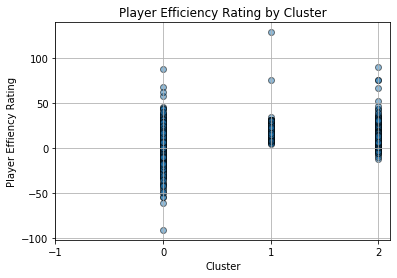

In [12]:
plt.scatter(labels, data['PER'], edgecolors='black', alpha=0.5)
plt.grid(axis='both', which='major')
plt.title('Player Efficiency Rating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Player Effiency Rating')
plt.xticks(np.arange(-1, 3, step=1))

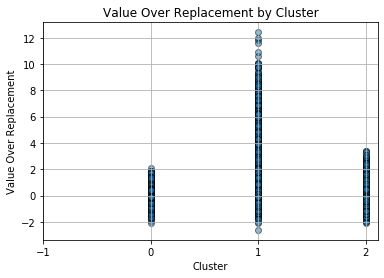

In [13]:
plt.scatter(labels, data['VORP'], edgecolors='black', alpha=0.5)
plt.grid(axis='both', which='major')
plt.title('Value Over Replacement by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value Over Replacement')
plt.xticks(np.arange(-1, 3, step=1))
plt.savefig('static/images/VORPVis.png')

([<matplotlib.axis.XTick at 0x22066069e48>,
 <a list of 4 Text xticklabel objects>)

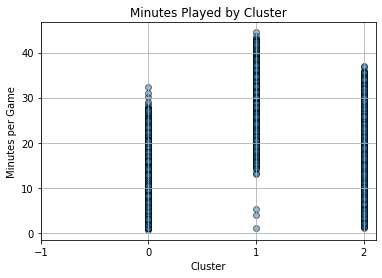

In [14]:
plt.scatter(labels, data['MP'], edgecolors='black', alpha=0.5)
plt.grid(axis='both', which='major')
plt.title('Minutes Played by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Minutes per Game')
plt.xticks(np.arange(-1, 3, step=1))

([<matplotlib.axis.XTick at 0x220660bcac8>,
 <a list of 4 Text xticklabel objects>)

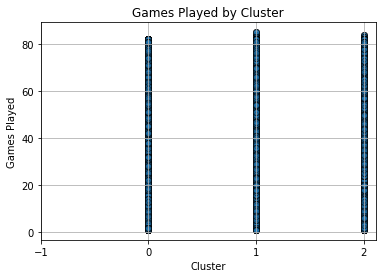

In [15]:
plt.scatter(labels, data['G'], edgecolors='black', alpha=0.5)
plt.grid(axis='both', which='major')
plt.title('Games Played by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Games Played')
plt.xticks(np.arange(-1, 3, step=1))

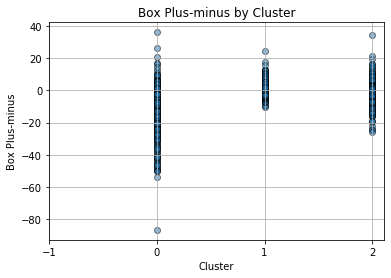

In [16]:
plt.scatter(labels, data['BPM'], edgecolors='black', alpha=0.5)
plt.grid(axis='both', which='major')
plt.title('Box Plus-minus by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Box Plus-minus')
plt.xticks(np.arange(-1, 3, step=1))
plt.savefig('static/images/BPM2Vis.png')